In [26]:
import scipy
import numpy as np
from astropy.io import fits
import os 
import matplotlib.pyplot as plt
from astropy.wcs import WCS
%matplotlib inline

In [27]:
datadir = "../symbiotic-IPHAS-spectros/"
fitsfile = "S18290608_0034572.fits"
hdulist= fits.open(os.path.join(datadir, fitsfile))

In [28]:
hdulist.info()

Filename: ../symbiotic-IPHAS-spectros/S18290608_0034572.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (1628, 1, 4)   float32   


In [29]:
hdulist[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    3 / Number of axes                                 
NAXIS1  =                 1628 / Axis length                                    
NAXIS2  =                    1 / Axis length                                    
NAXIS3  =                    4 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2008-02-18T17:48:58' / Date FITS file was generated                  
IRAF-TLM= '17:48:58 (18/02/2008)' / Time of last modification                   
OBJECT  = 'I182906 gr4'        / Name of the object observed                    
OBSERVAT= 'LaPalma        '                                                     
TELESCOP= 'NOT            ' 

In [30]:
hdu = hdulist[0]

In [31]:
hdu.data

array([[[-6.0711157e-18,  2.2383229e-17,  4.1665723e-17, ...,
          1.5510164e-15,  1.6136076e-15,  1.5828398e-15]],

       [[-8.2477352e-18,  1.2463201e-17,  2.1255187e-17, ...,
          1.5540249e-15,  1.6154423e-15,  1.5871608e-15]],

       [[ 5.2213176e-17,  4.3852596e-17,  5.0916021e-17, ...,
          2.7651564e-17,  4.2363334e-17,  6.7550110e-17]],

       [[ 8.7656495e-18,  8.8308611e-18,  1.0609131e-17, ...,
          1.6884750e-17,  1.8200877e-17,  1.9130864e-17]]], dtype=float32)

In [32]:
hdu.data[0]

array([[-6.0711157e-18,  2.2383229e-17,  4.1665723e-17, ...,
         1.5510164e-15,  1.6136076e-15,  1.5828398e-15]], dtype=float32)

In [33]:
data = hdulist[0].data

In [34]:
nx, wav0, i0, dwav = [hdu.header[k] for k in ("NAXIS1", "CRVAL1", "CRPIX1", "CD1_1")]
wavs = wav0 + (np.arange(nx) - (i0 - 1))*dwav 

In [35]:
wavs

array([3900.       , 3903.1346035, 3906.269207 , ..., 8993.7306881,
       8996.8652916, 8999.9998951])

In [53]:
Flux = hdulist[0].data.mean(axis=0)


In [71]:
Flux

array([[[-6.0711157e-18,  2.2383229e-17,  4.1665723e-17, ...,
          1.5510164e-15,  1.6136076e-15,  1.5828398e-15]],

       [[-8.2477352e-18,  1.2463201e-17,  2.1255187e-17, ...,
          1.5540249e-15,  1.6154423e-15,  1.5871608e-15]],

       [[ 5.2213176e-17,  4.3852596e-17,  5.0916021e-17, ...,
          2.7651564e-17,  4.2363334e-17,  6.7550110e-17]],

       [[ 8.7656495e-18,  8.8308611e-18,  1.0609131e-17, ...,
          1.6884750e-17,  1.8200877e-17,  1.9130864e-17]]], dtype=float32)

In [38]:
Flux0 = hdulist[0].data[0]
Flux0

array([[-6.0711157e-18,  2.2383229e-17,  4.1665723e-17, ...,
         1.5510164e-15,  1.6136076e-15,  1.5828398e-15]], dtype=float32)

In [48]:
W = [np.array(wave) for wave in wavs]
W

[array(3900.),
 array(3903.1346035),
 array(3906.269207),
 array(3909.4038105),
 array(3912.538414),
 array(3915.6730175),
 array(3918.807621),
 array(3921.9422245),
 array(3925.076828),
 array(3928.2114315),
 array(3931.346035),
 array(3934.4806385),
 array(3937.615242),
 array(3940.7498455),
 array(3943.88444901),
 array(3947.01905251),
 array(3950.15365601),
 array(3953.28825951),
 array(3956.42286301),
 array(3959.55746651),
 array(3962.69207001),
 array(3965.82667351),
 array(3968.96127701),
 array(3972.09588051),
 array(3975.23048401),
 array(3978.36508751),
 array(3981.49969101),
 array(3984.63429451),
 array(3987.76889801),
 array(3990.90350151),
 array(3994.03810501),
 array(3997.17270851),
 array(4000.30731201),
 array(4003.44191551),
 array(4006.57651901),
 array(4009.71112251),
 array(4012.84572601),
 array(4015.98032951),
 array(4019.11493301),
 array(4022.24953651),
 array(4025.38414001),
 array(4028.51874352),
 array(4031.65334702),
 array(4034.78795052),
 array(4037.922

In [40]:
F = [flux for flux in Flux]

In [61]:
F




[array([1.1664994e-17, 2.1882471e-17, 3.1111514e-17, ..., 7.8739442e-16,
        8.2240351e-16, 8.1417035e-16], dtype=float32)]

In [64]:
a = []
b = []

In [69]:
for aa, bb in zip(W, F):
    a.append(aa)
    b.append(bb)
b   

[array([1.1664994e-17, 2.1882471e-17, 3.1111514e-17, ..., 7.8739442e-16,
        8.2240351e-16, 8.1417035e-16], dtype=float32),
 array([1.1664994e-17, 2.1882471e-17, 3.1111514e-17, ..., 7.8739442e-16,
        8.2240351e-16, 8.1417035e-16], dtype=float32),
 array([1.1664994e-17, 2.1882471e-17, 3.1111514e-17, ..., 7.8739442e-16,
        8.2240351e-16, 8.1417035e-16], dtype=float32)]

ValueError: x and y must have same first dimension, but have shapes (1628,) and (1, 1628)

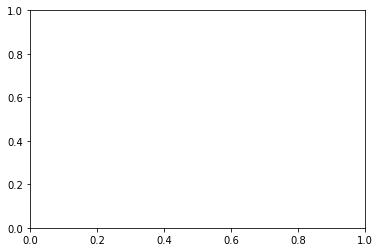

In [67]:

plt.plot(W, F)